# Optimal Portfolio Allocation

### Selection of Stock and Risk Aversion(Risk Seeking: A<0; Risk Averse: A>0)

In [33]:
# Fetch multiple stocks at once
stock_list = ["NVDA", "AAPL", "MSFT","COST","TSLA","AMZN","INTC","BTC","BA"]
# Risk aversion
A = 0.01

## Data Processing

### Import

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis, skew
import warnings
from scipy.stats import norm
import scipy.linalg as la
from matplotlib.widgets import Slider
import sys
from PyQt5.QtWidgets import (QApplication, QMainWindow, QVBoxLayout, QHBoxLayout, 
                            QWidget, QLabel, QDoubleSpinBox, QPushButton, QGroupBox, QSlider)
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from PyQt5.QtCore import Qt
import sys
import numpy as np
from scipy.stats import norm
from PyQt5.QtWidgets import *
from PyQt5.QtCore import Qt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

### Fetch stock historical data from yahoo finance

In [35]:
# Download historical data for all stocks
data = yf.download(stock_list, start="2024-01-01", interval="1d")

# Extract close prices
close_prices = data['Close']

# Calculate daily returns (percentage change)
daily_returns = close_prices.pct_change()  # Convert to percentage

# Remove the first row (NaN values from pct_change)
daily_returns = daily_returns.dropna()
# Annualize
daily_returns = 252 * np.log(1 + daily_returns)

# Calculate mean returns and convert to NumPy array
mean_returns = daily_returns.mean()
mean_np = mean_returns.to_numpy()

# Calculate covariance matrix
covariance_matrix = daily_returns.cov()
cov_np = covariance_matrix.to_numpy()  # Convert to NumPy array

# Calculate correlation matrix
correlation_matrix = daily_returns.corr()

[*********************100%***********************]  9 of 9 completed


## Display Stock Information

### Daily close price (%)

In [36]:
close_prices.tail()

Ticker,AAPL,AMZN,BA,BTC,COST,INTC,MSFT,NVDA,TSLA
Date,,,,,,,,,
2025-08-28,232.559998,231.600006,236.160004,49.580002,944.960022,24.930000,509.640015,180.169998,345.980011
2025-08-29,232.139999,229.000000,234.679993,47.930000,943.320007,24.350000,506.690002,174.179993,333.869995
2025-09-02,229.720001,225.339996,237.380005,49.080002,938.820007,24.209999,505.119995,170.779999,329.359985
2025-09-03,238.470001,225.990005,232.380005,49.720001,949.780029,24.000000,505.350006,170.619995,334.089996
2025-09-04,239.779999,235.679993,230.750000,48.619999,955.900024,24.610001,507.970001,171.660004,338.529999


### Daily Returns (%)

In [37]:
daily_returns.tail()

Ticker,AAPL,AMZN,BA,BTC,COST,INTC,MSFT,NVDA,TSLA
Date,,,,,,,,,
2025-08-28,2.253068,2.713009,0.576888,-0.457009,-1.213126,0.809964,1.438061,-1.992226,-2.622982
2025-08-29,-0.455518,-2.845022,-1.584249,-8.529178,-0.437736,-5.932091,-1.462921,-8.520532,-8.978589
2025-09-02,-2.640822,-4.060135,2.882729,5.974929,-1.205014,-1.453065,-0.782048,-4.967685,-3.427288
2025-09-03,9.420350,0.725865,-5.364644,3.264820,2.924872,-2.195400,0.114724,-0.236209,3.593287
2025-09-04,1.380534,10.580005,-1.773856,-5.637831,1.618576,6.324963,1.303123,1.531395,3.326981


### Summary Statistics for Daily Returns (%):

In [38]:
daily_returns.describe()

Ticker,AAPL,AMZN,BA,BTC,COST,INTC,MSFT,NVDA,TSLA
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,0.075861,0.212888,0.175809,0.476836,0.143503,-0.198738,0.187054,0.352696,0.347257
std,4.972158,5.481447,6.048208,7.821225,3.426683,10.324309,3.842009,8.350703,10.975960
min,-24.447390,-23.708502,-27.873241,-39.678273,-15.778820,-76.077828,-16.078045,-46.858404,-42.221527
25%,-1.757422,-2.437382,-2.811892,-3.961201,-1.616352,-5.585306,-1.498196,-3.562334,-5.738434
50%,0.298946,0.175157,0.396385,0.270008,0.116867,-0.498891,0.283850,0.862055,-0.108762
75%,2.370117,3.267969,3.371092,5.190623,2.063114,4.652984,2.002599,5.063086,7.138709
max,35.939608,28.507144,36.038524,32.302945,15.184262,43.313600,24.324243,43.248392,51.531626


### Daily Returns Covariance Matrix:

In [39]:
covariance_matrix

Ticker,AAPL,AMZN,BA,BTC,COST,INTC,MSFT,NVDA,TSLA
Ticker,,,,,,,,,
AAPL,24.722353,15.609896,13.424042,11.399944,7.099479,15.733432,10.229778,18.012256,26.142546
AMZN,15.609896,30.046256,16.016208,14.386917,6.100132,26.667377,14.351966,25.723325,31.214732
BA,13.424042,16.016208,36.580824,12.306442,6.898255,22.924871,8.478438,21.174087,28.758923
BTC,11.399944,14.386917,12.306442,61.171554,6.526116,13.262301,10.001352,22.273919,41.505991
COST,7.099479,6.100132,6.898255,6.526116,11.742154,5.965790,4.954008,6.731234,14.414392
INTC,15.733432,26.667377,22.924871,13.262301,5.965790,106.591350,14.059295,32.050265,38.306245
MSFT,10.229778,14.351966,8.478438,10.001352,4.954008,14.059295,14.761033,19.927285,19.347816
NVDA,18.012256,25.723325,21.174087,22.273919,6.731234,32.050265,19.927285,69.734245,43.057539
TSLA,26.142546,31.214732,28.758923,41.505991,14.414392,38.306245,19.347816,43.057539,120.471701


### Daily Returns Correlation Matrix:

In [40]:
correlation_matrix

Ticker,AAPL,AMZN,BA,BTC,COST,INTC,MSFT,NVDA,TSLA
Ticker,,,,,,,,,
AAPL,1.000000,0.572743,0.446387,0.293145,0.416685,0.306491,0.535504,0.433811,0.479028
AMZN,0.572743,1.000000,0.483101,0.335581,0.324766,0.471220,0.681487,0.561964,0.518826
BA,0.446387,0.483101,1.000000,0.260154,0.332842,0.367129,0.364864,0.419232,0.433215
BTC,0.293145,0.335581,0.260154,1.000000,0.243504,0.164242,0.332832,0.341035,0.483497
COST,0.416685,0.324766,0.332842,0.243504,1.000000,0.168629,0.376291,0.235233,0.383248
INTC,0.306491,0.471220,0.367129,0.164242,0.168629,1.000000,0.354441,0.371747,0.338038
MSFT,0.535504,0.681487,0.364864,0.332832,0.376291,0.354441,1.000000,0.621107,0.458808
NVDA,0.433811,0.561964,0.419232,0.341035,0.235233,0.371747,0.621107,1.000000,0.469768
TSLA,0.479028,0.518826,0.433215,0.483497,0.383248,0.338038,0.458808,0.469768,1.000000


### Distribution of Daily Return of Each Stock

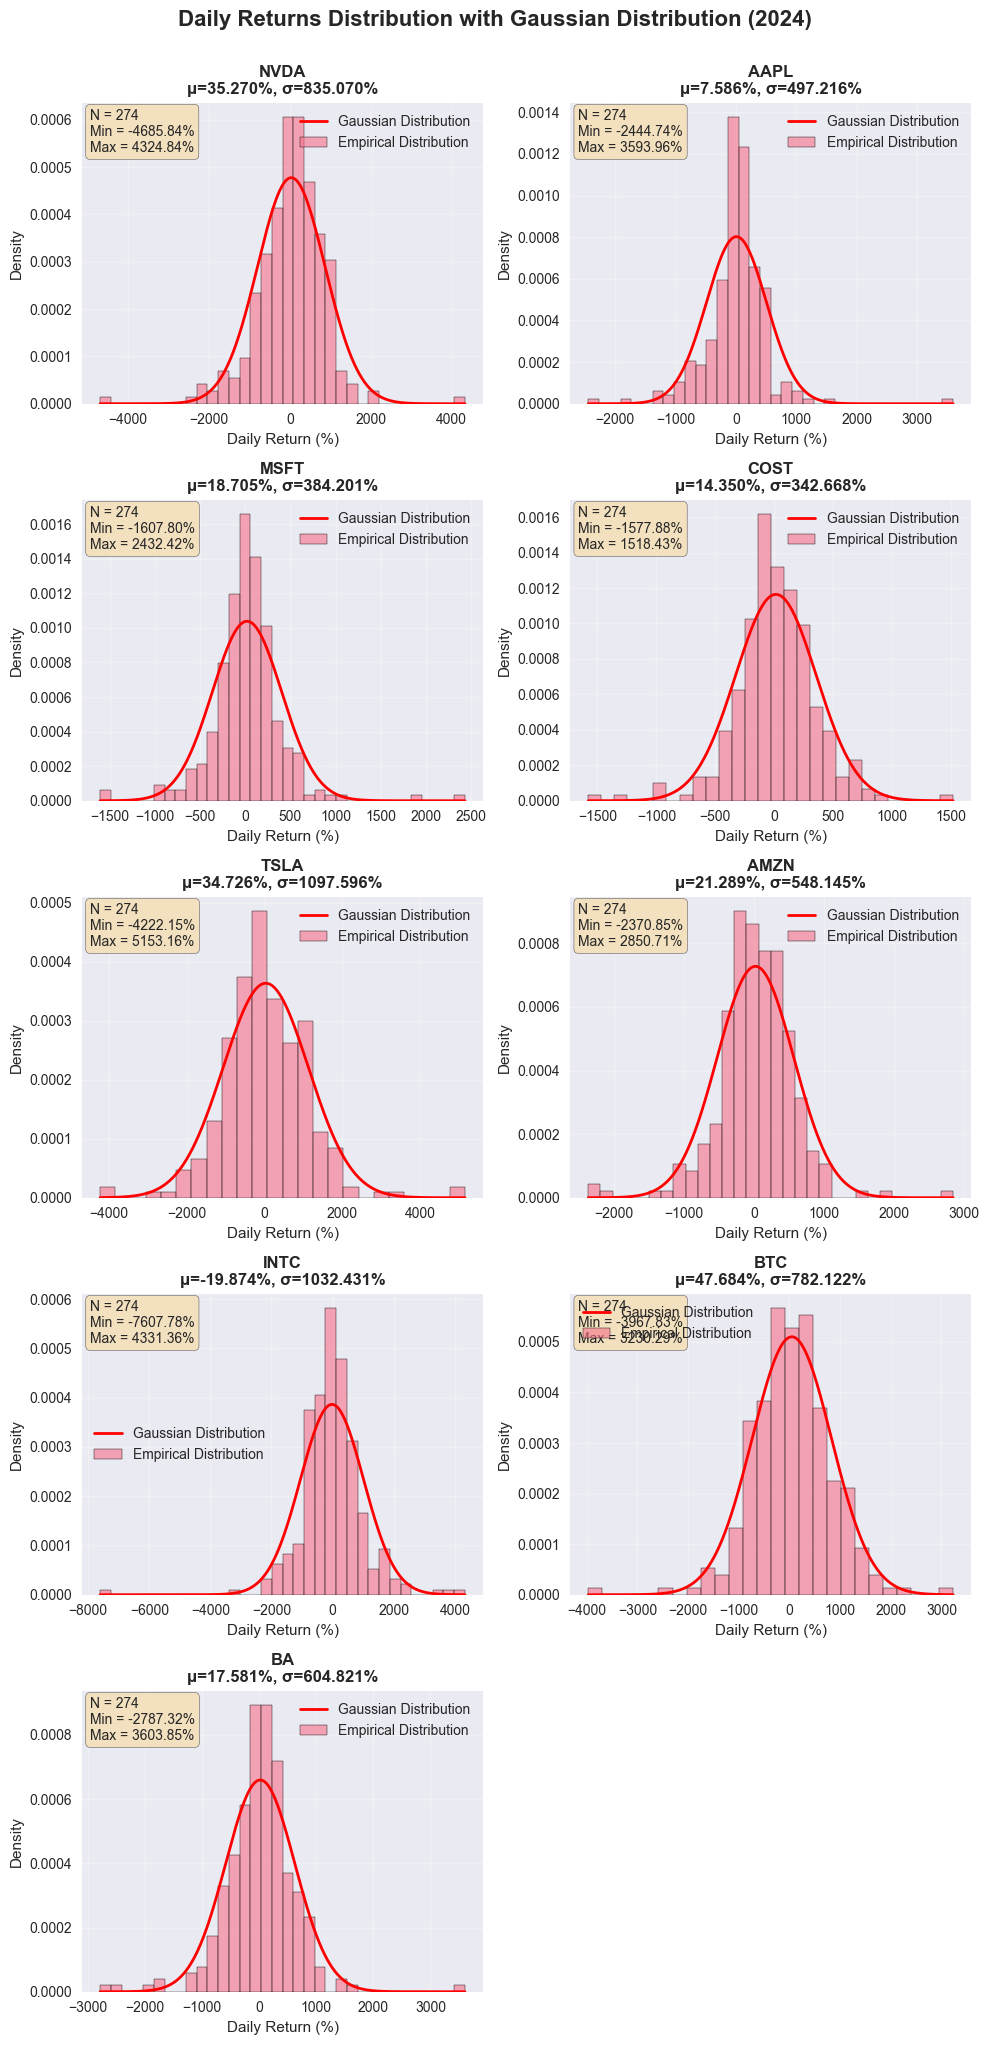

In [41]:
warnings.filterwarnings('ignore')
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Calculate the optimal grid size
n_stocks = len(stock_list)
n_cols = 2  # You can adjust this
n_rows = (n_stocks + n_cols - 1) // n_cols  # Ceiling division

# Create subplots with dynamic grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plot individual stock distributions
for i, stock in enumerate(stock_list):
    returns = daily_returns[stock].dropna()
    
    # Calculate statistics
    mu = returns.mean() * 100  # Convert to percentage for display
    std = returns.std() * 100   # Convert to percentage for display
    n_observations = len(returns)
    
    # Plot histogram with KDE
    sns.histplot(returns * 100, stat='density', alpha=0.6, 
                 label='Empirical Distribution', ax=axes[i])
    
    # Generate Gaussian distribution using calculated mean and std
    x = np.linspace(returns.min() * 100, returns.max() * 100, 1000)
    gaussian = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
    
    # Plot Gaussian distribution
    axes[i].plot(x, gaussian, 'r-', linewidth=2, label='Gaussian Distribution')
    
    # Customize plot
    axes[i].set_title(f'{stock}\n'
                     f'μ={mu:.3f}%, σ={std:.3f}%',
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Daily Return (%)')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    
    # Add text box with statistics
    textstr = f'N = {n_observations}\nMin = {returns.min()*100:.2f}%\nMax = {returns.max()*100:.2f}%'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    axes[i].text(0.02, 0.98, textstr, transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Remove any empty subplots
for i in range(len(stock_list), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Daily Returns Distribution with Gaussian Distribution (2024)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

## Machine Learning Seeking Optimal Portfolio

In [42]:
def cal_mean_var(weights, mean_np, cov_np): 
    portfolio_return = weights.T @ mean_np
    portfolio_variance = weights.T @ (cov_np @ weights)
    return portfolio_return, portfolio_variance

def cal_util(mu,var,A):
    return mu - 0.5*A*var

### Machine Learning Algorithms

In [43]:
def GD(w, mean_np, cov_np, learning_rate=0.000001, max_iterations=1000000):
    util_list = np.zeros(max_iterations)  # Pre-allocate
    finish_i = max_iterations - 1  # Default if we complete all iterations
    
    for i in range(max_iterations):
        cur_mu, cur_var = cal_mean_var(w, mean_np, cov_np)

        # Calculate gradient: A * COV @ w - MEAN
        gradient = A * (cov_np @ w) - mean_np
        # Update weights
        w_new = w - learning_rate * gradient
        
        # Project onto constraint: weights sum to 1
        w_new = w_new / np.sum(w_new)
        
        new_mu, new_var = cal_mean_var(w_new, mean_np, cov_np)
        new_util = cal_util(new_mu, new_var, A)
        
        # Store utility value
        util_list[i] = new_util
        
        # Check if converged (utility decreases)
        if (new_util - cal_util(cur_mu, cur_var, A)) < 1e-9:
            finish_i = i
            break
            
        w = w_new

    # Return only the relevant portion of util_list
    return w, finish_i, util_list[:finish_i+1]

def ADAM(w, mean_np, cov_np, learning_rate=0.001, max_iterations=1000000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    util_list = np.zeros(max_iterations)  # Pre-allocate
    finish_i = max_iterations - 1  # Default if we complete all iterations
    
    # Adam initialization
    m = np.zeros_like(w)  # First moment vector
    v = np.zeros_like(w)  # Second moment vector
    t = 0  # Time step
    
    for i in range(max_iterations):
        t += 1
        cur_mu, cur_var = cal_mean_var(w, mean_np, cov_np)

        # Calculate gradient: A * COV @ w - MEAN
        gradient = A * (cov_np @ w) - mean_np
        
        # Adam update
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        
        # Bias correction
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        # Update weights
        w_new = w - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        
        # Project onto constraint: weights sum to 1
        w_new = w_new / np.sum(w_new)
        
        new_mu, new_var = cal_mean_var(w_new, mean_np, cov_np)
        new_util = cal_util(new_mu, new_var, A)
        
        # Store utility value
        util_list[i] = new_util
        
        # Check if converged (utility decreases)
        if (new_util - cal_util(cur_mu, cur_var, A)) < 1e-9:
            finish_i = i
            break
            
        w = w_new

    return w, util_list, finish_i

def closed_form(A, mean_np, cov_np):
    if np.linalg.det(covariance_matrix) == 0:
        # Use pseudo-inverse if matrix is singular
        cov_inv = np.linalg.pinv(covariance_matrix)
    else:
        cov_inv = np.linalg.inv(covariance_matrix)

    w_opt = (1 / A) * cov_inv @ mean_np
    w_opt = w_opt / np.sum(w_opt)
    portfolio_return, portfolio_variance = cal_mean_var(w_opt, mean_np, cov_np)
    util = cal_util(portfolio_return,portfolio_variance,A)
    return w_opt, 1, np.array([util])

### Optimazation

#### Closed-Form

In [44]:
w, finish_i, util_list = closed_form(A, mean_np,cov_np)

### ADAM

In [45]:
w, finish_i, util_list = ADAM(np.array([1/len(stock_list)] * len(stock_list)), mean_np, cov_np, learning_rate=0.000001, max_iterations=1000000, beta1=0.9, beta2=0.999, epsilon=1e-8)

#### GD

In [46]:
w, finish_i, util_list = GD(np.array([1/len(stock_list)] * len(stock_list)), mean_np,cov_np, learning_rate = 0.000001, max_iterations = 10000000)

## Machine Learning Outcome

### Learning curve and optimal portfolio distribution

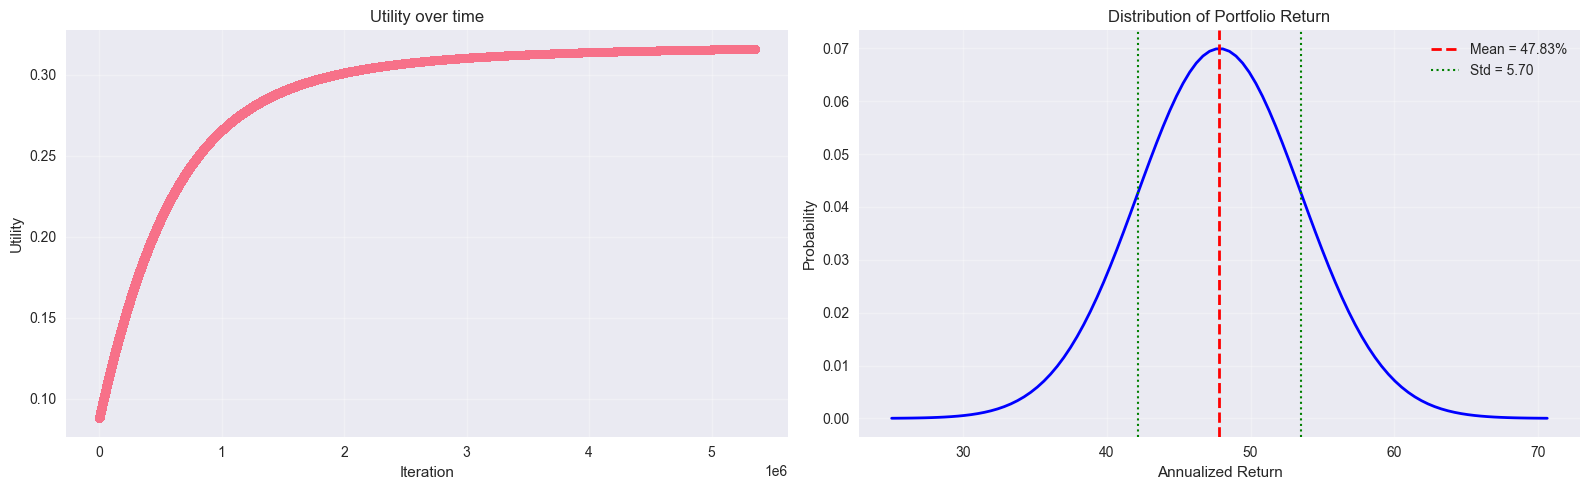

In [47]:
portfolio_return, portfolio_variance = cal_mean_var(w, mean_np, cov_np)
utility = cal_util(portfolio_return,portfolio_variance,A)
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# First plot: Utility List
ax1.plot(util_list, marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_title('Utility over time')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Utility')
ax1.grid(True, alpha=0.3)

# Second plot: Gaussian Distribution
mean = portfolio_return*100
std = np.sqrt(portfolio_variance)
x_range = (mean - 4*std, mean + 4*std)
x = np.linspace(x_range[0], x_range[1], 100)
y = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean)/std)**2)

ax2.plot(x, y, 'b-', linewidth=2)
ax2.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}%')
ax2.axvline(mean + std, color='green', linestyle=':', linewidth=1.5, label=f'Std = {std:.2f}')
ax2.axvline(mean - std, color='green', linestyle=':', linewidth=1.5)
ax2.set_title(f'Distribution of Portfolio Return')
ax2.set_xlabel('Annualized Return')
ax2.set_ylabel('Probability')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

### Summary of Portfolio

PORTFOLIO ANALYSIS
# of Long Positions:             7
# of Short Positions:            2
Max Allocation:              41.2%
Min Allocation:             -32.4%
Utility:                      0.32

DETAILED BREAKDOWN:
--------------------------------------------------
  COST:    41.2% (LONG)
  AMZN:   -32.4% (SHORT)
   BTC:    22.7% (LONG)
  INTC:    20.8% (LONG)
  TSLA:    20.2% (LONG)
  AAPL:    18.6% (LONG)
  MSFT:    12.9% (LONG)
  NVDA:    -7.9% (SHORT)
    BA:     3.9% (LONG)


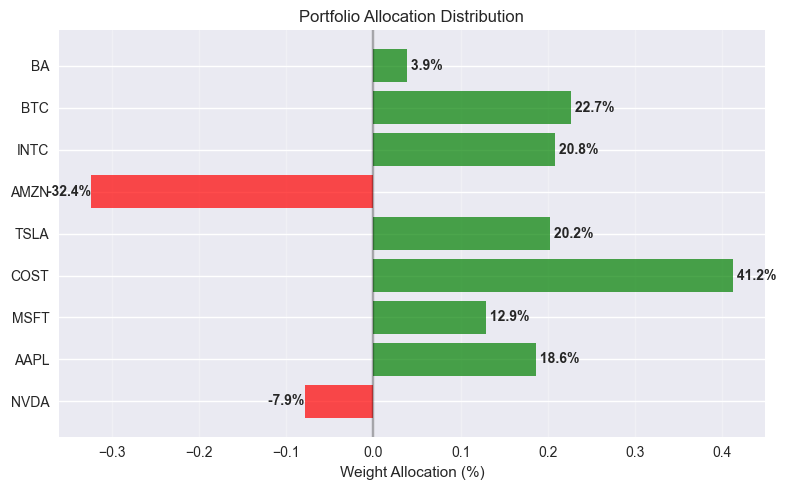

In [48]:
# Sample data (replace with your actual data)
positive_weights = [w for w in w if w > 0]
negative_weights = [w for w in w if w < 0]

print("PORTFOLIO ANALYSIS")
print("=" * 50)
print(f"{'# of Long Positions:':<25} {len(positive_weights):>8}")
print(f"{'# of Short Positions:':<25} {len(negative_weights):>8}")
print(f"{'Max Allocation:':<25} {max(w):>8.1%}")
print(f"{'Min Allocation:':<25} {min(w):>8.1%}")
print(f"{'Utility:':<25} {utility:>8.2f}")
print("\nDETAILED BREAKDOWN:")
print("-" * 50)

# Sort by absolute weight (descending)
sorted_data = sorted(zip(stock_list, w), key=lambda x: abs(x[1]), reverse=True)

for stock, weight in sorted_data:
    position_type = "LONG" if weight > 0 else "SHORT"
    print(f"{stock:>6}: {weight:>8.1%} ({position_type})")

# Create bar graph
plt.figure(figsize=(8, 5))
colors = ['green' if weight > 0 else 'red' for weight in w]
bars = plt.barh(stock_list, w, color=colors, alpha=0.7)

plt.xlabel('Weight Allocation (%)')
plt.title('Portfolio Allocation Distribution')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Add value labels to bars
for i, (stock, weight) in enumerate(zip(stock_list, w)):
    plt.text(weight, i, f' {weight:.1%}', 
             va='center', 
             ha='left' if weight > 0 else 'right',
             fontweight='bold')

plt.tight_layout()
plt.show()

### Interactive Distribution graph

In [49]:
class GaussianPlotter(QMainWindow):
    def __init__(self,portfolio_return,portfolio_variance):
        super().__init__()
        self.mean =portfolio_return
        self.variance = portfolio_variance
        self.std_dev = np.sqrt(self.variance)
        self.initUI()
        
    def initUI(self):
        self.setWindowTitle(f"Interactive Gaussian Distribution: N({self.mean:.2f},{self.variance:.2f})")
        self.setGeometry(100, 100, 1200, 800)
        
        # Main widget and layout
        central_widget = QWidget()
        self.setCentralWidget(central_widget)
        main_layout = QHBoxLayout(central_widget)
        
        # Left panel for controls
        control_panel = QGroupBox("Controls")
        control_layout = QVBoxLayout()
        
        # Return selection with slider
        return_layout = QVBoxLayout()
        return_layout.addWidget(QLabel("Select Return (%):"))
        
        # Slider for return selection
        self.return_slider = QSlider(Qt.Horizontal)
        self.return_slider.setMinimum(0)
        self.return_slider.setMaximum(1000)  # Use fine granularity for smooth sliding
        return_layout.addWidget(self.return_slider)
        
        # Display for current return value
        self.return_display = QLabel(f"{self.mean:.2f}%")
        self.return_display.setStyleSheet("font-weight: bold; font-size: 20px;")
        self.return_display.setAlignment(Qt.AlignCenter)
        return_layout.addWidget(self.return_display)
        
        control_layout.addLayout(return_layout)
        
        # Probability display
        self.prob_label = QLabel("")
        self.prob_label.setStyleSheet("font-weight: bold; font-size: 24px;")
        control_layout.addWidget(self.prob_label)
        
        # Additional info
        info_label = QLabel("Drag the slider to select different return values and see the corresponding probabilities")
        info_label.setWordWrap(True)
        control_layout.addWidget(info_label)
        
        control_panel.setLayout(control_layout)
        control_panel.setFixedWidth(300)
        main_layout.addWidget(control_panel)
        
        # Right panel for plot
        plot_widget = QWidget()
        plot_layout = QVBoxLayout(plot_widget)
        
        # Matplotlib figure
        self.figure = Figure(figsize=(10, 8))
        self.canvas = FigureCanvas(self.figure)
        plot_layout.addWidget(self.canvas)
        
        main_layout.addWidget(plot_widget)
        
        # Initialize plot first to create the selected_line attribute
        self.setup_plot()
        
        # Then initialize slider and connect the signal
        self.initialize_slider()
        self.return_slider.valueChanged.connect(self.slider_changed)
        
    def initialize_slider(self):
        """Initialize the slider range based on the distribution parameters"""
        min_val = self.mean - 4 * self.std_dev
        max_val = self.mean + 4 * self.std_dev
        
        # Set slider range (we'll map the 0-1000 slider values to the actual range)
        self.slider_min = min_val
        self.slider_max = max_val
        
        # Set initial slider position to correspond to the mean
        initial_slider_value = int(500)  # Middle of the range (0-1000)
        self.return_slider.setValue(initial_slider_value)
        
    def slider_changed(self, value):
        """Handle slider value changes"""
        # Convert slider value (0-1000) to actual return value
        return_value = self.slider_min + (value / 1000) * (self.slider_max - self.slider_min)
        
        # Update display
        self.return_display.setText(f"{return_value:.2f}%")
        
        # Update plot
        self.update_plot(return_value)
        
    def setup_plot(self):
        self.figure.clear()
        self.ax = self.figure.add_subplot(111)
        
        # Calculate x range
        x_range = (self.mean - 4*self.std_dev, self.mean + 4*self.std_dev)
        x = np.linspace(x_range[0], x_range[1], 1000)
        y = norm.pdf(x, self.mean, self.std_dev)
        
        # Plot Gaussian curve
        self.ax.plot(x, y, 'b-', linewidth=2, label=f'N({self.mean:.2f}, {self.variance:.4f})')
        
        # Plot mean line
        self.ax.axvline(self.mean, color='red', linestyle='--', linewidth=2, 
                       label=f'Mean (μ) = {self.mean:.2f}%')
        
        # Plot ±1 standard deviation lines
        self.ax.axvline(self.mean + self.std_dev, color='green', linestyle=':', linewidth=2,
                       label=f'Std Dev (σ) = {self.std_dev:.4f}')
        self.ax.axvline(self.mean - self.std_dev, color='green', linestyle=':', linewidth=2)
        
        # Plot selected return line
        self.selected_line = self.ax.axvline(self.mean, color='purple', linestyle='-', 
                                           linewidth=3, alpha=0.8)
        
        # Add annotation
        self.annotation = self.ax.annotate(
            '',
            xy=(self.mean, norm.pdf(self.mean, self.mean, self.std_dev)),
            xytext=(20, 40),
            textcoords='offset points',
            bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="black", alpha=0.9),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='black')
        )
        
        # Set labels and title
        self.ax.set_title('', 
                         fontsize=20)
        self.ax.set_xlabel('Return (%)', fontsize=18)
        self.ax.set_ylabel('Probability Density', fontsize=18)
        
        # Add legend and grid
        self.ax.legend()
        self.ax.grid(True, alpha=0.3)
        
        # Update plot with initial values
        self.update_plot(self.mean)
        
    def update_plot(self, selected_return):
        # Update vertical line position
        self.selected_line.set_xdata([selected_return, selected_return])
        
        # Calculate probabilities
        prob_greater = 1 - norm.cdf(selected_return, self.mean, self.std_dev)
        prob_less = norm.cdf(selected_return, self.mean, self.std_dev)
        pdf_value = norm.pdf(selected_return, self.mean, self.std_dev)
        
        # Update annotation text and position
        annotation_text = (f'Return: {selected_return:.2f}%\n'
                          f'P(return > {selected_return:.2f}%) = {prob_greater:.4f}\n'
                          f'P(return < {selected_return:.2f}%) = {prob_less:.4f}')
        
        self.annotation.set_text(annotation_text)
        self.annotation.xy = (selected_return, pdf_value)
        
        # Update probability label
        self.prob_label.setText(f"\nYou have {prob_greater*100:.1f}% \nprobability to earn \nmore than {selected_return:.2f}%")
        # Redraw canvas
        self.canvas.draw()
    def closeEvent(self, event):
        # Perform any cleanup here if needed
        event.accept()  # This accepts the close event

def main():
    try:
        app = QApplication(sys.argv)
        window = GaussianPlotter(portfolio_return*100, portfolio_variance)
        window.show()
        sys.exit(app.exec_())
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

if __name__ == '__main__':
    main()

SystemExit: 0